In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# Import the pandas library as pd
import pandas as pd

# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('RI-clean.csv')

# Examine the head of the DataFrame
display(ri.head())

# Count the number of missing values in each column
print(ri.isnull().sum())

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,NaN,NaN,NaN,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,RI,2005-01-02,20:30,Zone X4,NaN,NaN,NaN,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,RI-2005-00003,RI,2005-01-04,11:30,Zone X1,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X1
3,RI-2005-00004,RI,2005-01-04,12:55,Zone X4,NaN,NaN,NaN,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,RI,2005-01-06,01:30,Zone X4,NaN,NaN,NaN,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4


id                           0
state                        0
stop_date                    0
stop_time                    0
location_raw                 0
county_name              90332
county_fips              90332
fine_grained_location    90332
police_department            0
driver_gender             3824
driver_age_raw            3796
driver_age                4147
driver_race_raw           3821
driver_race               3821
violation_raw             3821
violation                 3821
search_conducted             0
search_type_raw          86886
search_type              86886
contraband_found             0
stop_outcome              3821
is_arrested               3821
stop_duration             3821
out_of_state              4117
drugs_related_stop           0
district                     0
dtype: int64


In [2]:
# Examine the shape of the DataFrame
print(ri.shape)

# Drop the 'county_name' and 'state' columns
ri.drop(['county_name','state'], axis='columns', inplace=True)

# Examine the shape of the DataFrame (again)
print(ri.shape)

(90332, 26)
(90332, 24)


In [3]:

# Count the number of missing values in each column
print(ri.isnull().sum())

# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isnull().sum())

# Examine the shape of the DataFrame
print(ri.shape)

id                           0
stop_date                    0
stop_time                    0
location_raw                 0
county_fips              90332
fine_grained_location    90332
police_department            0
driver_gender             3824
driver_age_raw            3796
driver_age                4147
driver_race_raw           3821
driver_race               3821
violation_raw             3821
violation                 3821
search_conducted             0
search_type_raw          86886
search_type              86886
contraband_found             0
stop_outcome              3821
is_arrested               3821
stop_duration             3821
out_of_state              4117
drugs_related_stop           0
district                     0
dtype: int64
id                           0
stop_date                    0
stop_time                    0
location_raw                 0
county_fips              86508
fine_grained_location    86508
police_department            0
driver_gender             

In [4]:
# check the columns data types
ri.dtypes

id                        object
stop_date                 object
stop_time                 object
location_raw              object
county_fips              float64
fine_grained_location    float64
police_department         object
driver_gender             object
driver_age_raw           float64
driver_age               float64
driver_race_raw           object
driver_race               object
violation_raw             object
violation                 object
search_conducted            bool
search_type_raw           object
search_type               object
contraband_found            bool
stop_outcome              object
is_arrested               object
stop_duration             object
out_of_state              object
drugs_related_stop          bool
district                  object
dtype: object

In [5]:
# Examine the head of the 'is_arrested' column
print(ri.is_arrested.dtypes)

# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')

# Check the data type of 'is_arrested' 
print(ri.is_arrested.dtypes)

object
bool


In [6]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time,sep=' ')

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the data types of the DataFrame
print(ri.dtypes)

id                               object
stop_date                        object
stop_time                        object
location_raw                     object
county_fips                     float64
fine_grained_location           float64
police_department                object
driver_gender                    object
driver_age_raw                  float64
driver_age                      float64
driver_race_raw                  object
driver_race                      object
violation_raw                    object
violation                        object
search_conducted                   bool
search_type_raw                  object
search_type                      object
contraband_found                   bool
stop_outcome                     object
is_arrested                        bool
stop_duration                    object
out_of_state                     object
drugs_related_stop                 bool
district                         object
stop_datetime            datetime64[ns]


In [7]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

# Examine the index
print(ri.index)

# Examine the columns
print(ri.columns)

DatetimeIndex(['2005-01-02 01:55:00', '2005-01-02 20:30:00',
               '2005-01-04 12:55:00', '2005-01-06 01:30:00',
               '2005-01-12 08:05:00', '2005-01-18 08:15:00',
               '2005-01-18 17:13:00', '2005-01-23 23:15:00',
               '2005-01-24 20:32:00', '2005-02-09 03:05:00',
               ...
               '2007-04-23 23:25:00', '2007-04-23 23:30:00',
               '2007-04-23 23:30:00', '2007-04-23 23:30:00',
               '2007-04-23 23:35:00', '2007-04-23 23:56:00',
               '2007-04-24 00:02:00', '2007-04-24 00:05:00',
               '2007-04-24 00:10:00', '2007-04-24 00:15:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86508, freq=None)
Index(['id', 'stop_date', 'stop_time', 'location_raw', 'county_fips',
       'fine_grained_location', 'police_department', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race_raw', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type_ra

In [8]:
# Count the unique values in 'violation'
print(ri.violation.unique())

# Express the counts as proportions
print(ri.violation.value_counts(normalize=True))

['Speeding' 'Equipment' 'Other' 'Moving violation' 'Registration/plates']
Speeding               0.766935
Moving violation       0.122729
Equipment              0.062584
Registration/plates    0.029223
Other                  0.018530
Name: violation, dtype: float64


In [9]:

# Create a DataFrame of female drivers
female = ri[ri.driver_gender=='F']

# Create a DataFrame of male drivers
male = ri[ri.driver_gender=='M']

# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize=True))

# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))

Speeding               0.822736
Moving violation       0.090839
Equipment              0.044582
Registration/plates    0.025131
Other                  0.016713
Name: violation, dtype: float64
Speeding               0.744922
Moving violation       0.135309
Equipment              0.069685
Registration/plates    0.030837
Other                  0.019247
Name: violation, dtype: float64


In [10]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender=='F') & (ri.violation=='Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender=='M') & (ri.violation=='Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.977252
Warning             0.010331
Arrest Driver       0.007351
N/D                 0.002831
Arrest Passenger    0.001589
No Action           0.000646
Name: stop_outcome, dtype: float64
Citation            0.962088
Arrest Driver       0.023414
Warning             0.008807
N/D                 0.003116
Arrest Passenger    0.001991
No Action           0.000584
Name: stop_outcome, dtype: float64


In [11]:
# Check the data type of 'search_conducted'
print(ri.search_conducted.dtypes)

# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize=True))

# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

bool
False    0.960166
True     0.039834
Name: search_conducted, dtype: float64
0.03983446617653859


In [12]:
# Calculate the search rate for female drivers
print(ri[ri.driver_gender=='F'].search_conducted.mean())
# Calculate the search rate for male drivers
print(ri[ri.driver_gender=='M'].search_conducted.mean())

0.018265773128473356
0.0483428976723193


In [13]:
# Calculate the search rate for both groups simultaneously
ri.search_conducted=ri.search_conducted.astype('bool')
print(ri.groupby('driver_gender').search_conducted.mean())

driver_gender
F    0.018266
M    0.048343
Name: search_conducted, dtype: float64


In [14]:
# Calculate the search rate for each combination of gender and violation
print(ri.groupby(['driver_gender','violation']).search_conducted.mean())

driver_gender  violation          
F              Equipment              0.084326
               Moving violation       0.051732
               Other                  0.058680
               Registration/plates    0.112195
               Speeding               0.007301
M              Equipment              0.120287
               Moving violation       0.087443
               Other                  0.146566
               Registration/plates    0.166754
               Speeding               0.027071
Name: search_conducted, dtype: float64


In [15]:
# Reverse the ordering to group by violation before gender
print(ri.groupby(['violation','driver_gender']).search_conducted.mean())

violation            driver_gender
Equipment            F                0.084326
                     M                0.120287
Moving violation     F                0.051732
                     M                0.087443
Other                F                0.058680
                     M                0.146566
Registration/plates  F                0.112195
                     M                0.166754
Speeding             F                0.007301
                     M                0.027071
Name: search_conducted, dtype: float64


In [16]:
print(ri.groupby('violation').count())

                        id  stop_date  ...  drugs_related_stop  district
violation                              ...                              
Equipment             5414       5414  ...                5414      5414
Moving violation     10617      10617  ...               10617     10617
Other                 1603       1603  ...                1603      1603
Registration/plates   2528       2528  ...                2528      2528
Speeding             66346      66346  ...               66346     66346

[5 rows x 23 columns]


In [17]:
# Count the 'search_type' values
print(ri.search_type.value_counts())

# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

# Check the data type of 'frisk'
print(ri.frisk.dtypes)

# Take the sum of 'frisk'
print(ri.frisk.sum())

Incident to Arrest                                          1576
Probable Cause                                               486
Protective Frisk                                             317
Inventory                                                    207
Incident to Arrest,Inventory                                 180
Incident to Arrest,Probable Cause                            111
Reasonable Suspicion                                         108
Incident to Arrest,Protective Frisk                          105
Probable Cause,Protective Frisk                               67
Incident to Arrest,Inventory,Protective Frisk                 57
Incident to Arrest,Inventory,Probable Cause                   43
Incident to Arrest,Probable Cause,Protective Frisk            37
Inventory,Protective Frisk                                    35
Probable Cause,Reasonable Suspicion                           27
Protective Frisk,Reasonable Suspicion                         26
Inventory,Probable Cause 

In [18]:

# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender')['frisk'].mean())

0.1929773650609402
driver_gender
F    0.138702
M    0.201067
Name: frisk, dtype: float64


In [19]:
ri.index

DatetimeIndex(['2005-01-02 01:55:00', '2005-01-02 20:30:00',
               '2005-01-04 12:55:00', '2005-01-06 01:30:00',
               '2005-01-12 08:05:00', '2005-01-18 08:15:00',
               '2005-01-18 17:13:00', '2005-01-23 23:15:00',
               '2005-01-24 20:32:00', '2005-02-09 03:05:00',
               ...
               '2007-04-23 23:25:00', '2007-04-23 23:30:00',
               '2007-04-23 23:30:00', '2007-04-23 23:30:00',
               '2007-04-23 23:35:00', '2007-04-23 23:56:00',
               '2007-04-24 00:02:00', '2007-04-24 00:05:00',
               '2007-04-24 00:10:00', '2007-04-24 00:15:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86508, freq=None)

In [22]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.04560271882369261
stop_datetime
0     0.075387
1     0.090330
2     0.099524
3     0.080573
4     0.080808
5     0.041667
6     0.018414
7     0.018873
8     0.024174
9     0.028001
10    0.029674
11    0.025170
12    0.036632
13    0.032480
14    0.033262
15    0.038874
16    0.041726
17    0.049521
18    0.052683
19    0.050887
20    0.052511
21    0.089703
22    0.067142
23    0.056752
Name: is_arrested, dtype: float64


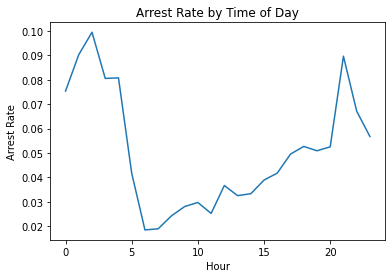

In [26]:
hourly_arrest_rate.plot()
# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

stop_datetime
2005-12-31    0.008038
2006-12-31    0.006624
2007-12-31    0.006357
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


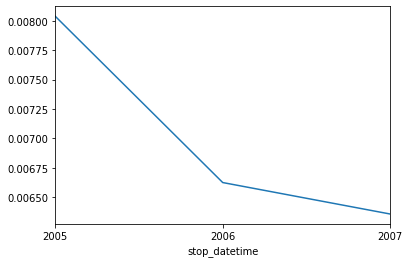

In [28]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

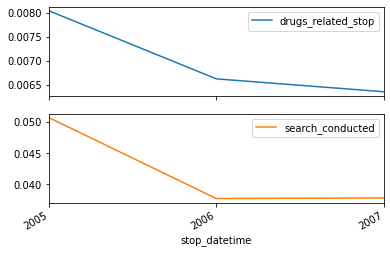

In [29]:

# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate,annual_search_rate], axis=1)

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

In [30]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri['district'],ri['violation']))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri['district'],ri['violation'])

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

violation  Equipment  Moving violation  Other  Registration/plates  Speeding
district                                                                    
Zon                0                 1      0                    0         0
Zone K1          461               921     98                   90     10024
Zone K2          815              1945    251                  433     13552
Zone K3         1861              1961    423                  676     18984
Zone X1          116               822     62                   10      1596
Zone X3          531              1464    226                  224      9138
Zone X4         1630              3503    543                 1095     13052
violation  Equipment  Moving violation  Other  Registration/plates  Speeding
district                                                                    
Zone K1          461               921     98                   90     10024
Zone K2          815              1945    251                  433     13552

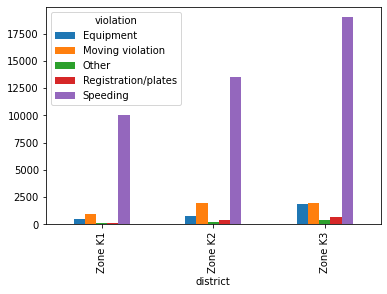

In [31]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()

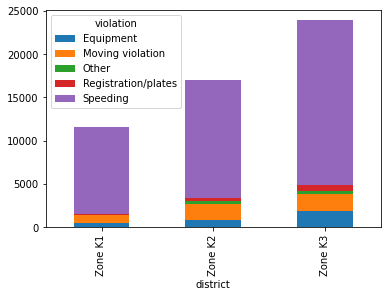

In [32]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)

# Display the plot
plt.show()

In [34]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri['stop_minutes'].unique())

['0-15 Min' '16-30 Min' '30+ Min']
[ 8 23 45]


violation_raw
APB                                 26.147727
Call for Service                    25.855040
Equipment/Inspection Violation      13.381419
Motorist Assist/Courtesy            16.887160
Other Traffic Violation             13.955826
Registration Violation              16.494066
Special Detail/Directed Patrol      30.540741
Speeding                             9.675474
Suspicious Person                   21.704545
Violation of City/Town Ordinance    10.428571
Warrant                             22.523810
Name: stop_minutes, dtype: float64


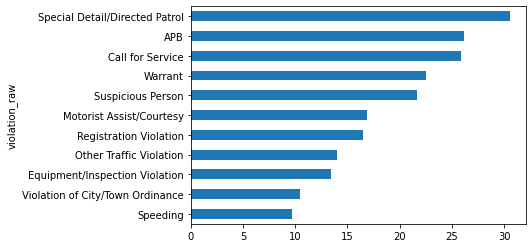

In [35]:

# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh',)

# Display the plot
plt.show()

In [36]:
weather=pd.read_csv('weather.csv')
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


              TAVG         TMAX         TMIN
count  1217.000000  8005.000000  7996.000000
mean     52.493016    61.247096    42.099425
std      17.829792    18.495043    17.386667
min       6.000000    13.000000   -10.000000
25%      39.000000    46.000000    29.000000
50%      54.000000    62.000000    42.000000
75%      68.000000    77.000000    57.000000
max      86.000000   102.000000    77.000000


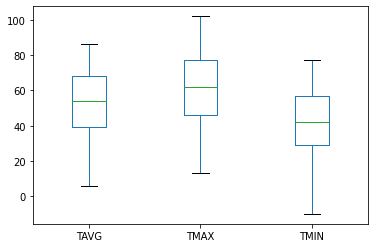

In [39]:
# Describe the temperature columns
print(weather[['TAVG','TMAX','TMIN']].describe())

# Create a box plot of the temperature columns
weather[['TAVG','TMAX','TMIN']].plot(kind='box')

# Display the plot
plt.show()

count    7994.000000
mean       19.149237
std         7.009716
min       -25.000000
25%        14.000000
50%        19.000000
75%        24.000000
max        48.000000
Name: TDIFF, dtype: float64


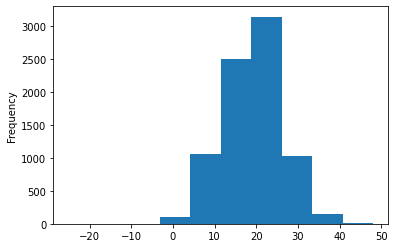

In [40]:

# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF']=weather.TMAX-weather.TMIN

# Describe the 'TDIFF' column
print(weather.TDIFF.describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind='hist')

# Display the plot

plt.show()

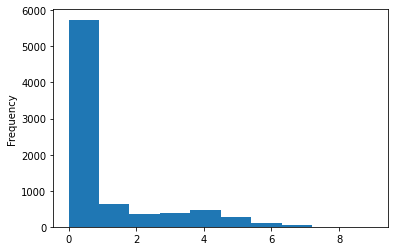

In [41]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:,'WT01':'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis=1)

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind='hist')

# Display the plot
plt.show()

In [42]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather.rating.value_counts())

0    5738
1     628
2     368
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
good     5738
bad      1852
worse     432
Name: rating, dtype: int64


In [48]:
# Create a list of weather ratings in logical order

cats=['good', 'bad', 'worse']
# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype('category')

# Examine the head of 'rating'
print(weather['rating'].head())

0    good
1    good
2    good
3    good
4    good
Name: rating, dtype: category
Categories (3, object): [bad, good, worse]


In [49]:
# Reset the index of 'ri'
ri.reset_index(inplace=True)

# Examine the head of 'ri'
print(ri.head())

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating=weather[['DATE','rating']]

# Examine the head of 'weather_rating'
print(weather_rating.head())

        stop_datetime             id   stop_date  ... district  frisk  stop_minutes
0 2005-01-02 01:55:00  RI-2005-00001  2005-01-02  ...  Zone K1  False             8
1 2005-01-02 20:30:00  RI-2005-00002  2005-01-02  ...  Zone X4  False            23
2 2005-01-04 12:55:00  RI-2005-00004  2005-01-04  ...  Zone X4  False             8
3 2005-01-06 01:30:00  RI-2005-00005  2005-01-06  ...  Zone X4  False             8
4 2005-01-12 08:05:00  RI-2005-00006  2005-01-12  ...  Zone X1  False            45

[5 rows x 27 columns]
         DATE rating
0  2005-01-01   good
1  2005-01-02   good
2  2005-01-03   good
3  2005-01-04   good
4  2005-01-05   good


In [52]:

# Examine the shape of 'ri'
print(ri.shape)

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

(86508, 27)
(172400, 29)


In [53]:
# Calculate the overall arrest rate
print(ri_weather.is_arrested.mean())

0.04567285382830626


In [55]:
# Calculate the arrest rate for each 'rating'
print(ri_weather.groupby('rating').is_arrested.mean())

rating
bad      0.046148
good     0.045148
worse    0.051388
Name: is_arrested, dtype: float64


In [56]:

# Calculate the arrest rate for each 'violation' and 'rating'
print(ri_weather.groupby(['violation','rating']).is_arrested.mean())

violation            rating
Equipment            bad       0.113166
                     good      0.110235
                     worse     0.130909
Moving violation     bad       0.108970
                     good      0.105770
                     worse     0.117526
Other                bad       0.251225
                     good      0.251470
                     worse     0.254438
Registration/plates  bad       0.193182
                     good      0.172542
                     worse     0.147059
Speeding             bad       0.019259
                     good      0.020771
                     worse     0.021743
Name: is_arrested, dtype: float64


In [57]:

# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

# Print the 'arrest_rate' Series
print(arrest_rate)

# Print the arrest rate for moving violations in bad weather
print(print(arrest_rate.loc['Moving violation', 'bad']))

# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])

violation            rating
Equipment            bad       0.113166
                     good      0.110235
                     worse     0.130909
Moving violation     bad       0.108970
                     good      0.105770
                     worse     0.117526
Other                bad       0.251225
                     good      0.251470
                     worse     0.254438
Registration/plates  bad       0.193182
                     good      0.172542
                     worse     0.147059
Speeding             bad       0.019259
                     good      0.020771
                     worse     0.021743
Name: is_arrested, dtype: float64
0.10896974063400576
None
rating
bad      0.019259
good     0.020771
worse    0.021743
Name: is_arrested, dtype: float64


In [58]:
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

rating                    bad      good     worse
violation                                        
Equipment            0.113166  0.110235  0.130909
Moving violation     0.108970  0.105770  0.117526
Other                0.251225  0.251470  0.254438
Registration/plates  0.193182  0.172542  0.147059
Speeding             0.019259  0.020771  0.021743
rating                    bad      good     worse
violation                                        
Equipment            0.113166  0.110235  0.130909
Moving violation     0.108970  0.105770  0.117526
Other                0.251225  0.251470  0.254438
Registration/plates  0.193182  0.172542  0.147059
Speeding             0.019259  0.020771  0.021743
